In [94]:
from datetime import datetime as dt, timedelta
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

Load the [web_events.csv](https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/web_events.csv) data set into a Pandas dataframe.

In [127]:
web_events_df = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/web_events.csv')
web_events_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2756101 entries, 0 to 2756100
Data columns (total 5 columns):
 #   Column         Dtype  
---  ------         -----  
 0   timestamp      int64  
 1   visitorid      int64  
 2   event          object 
 3   itemid         int64  
 4   transactionid  float64
dtypes: float64(1), int64(3), object(1)
memory usage: 105.1+ MB


Convert the values in the timestamp field to datetimes.

In [128]:
web_events_df['timestamp'] = pd.to_datetime(web_events_df['timestamp'], unit='ms')

In [129]:
web_events_df

,timestamp,visitorid,event,itemid,transactionid
0,2015-06-02 05:02:12.117,257597,view,355908,NaN
1,2015-06-02 05:50:14.164,992329,view,248676,NaN
2,2015-06-02 05:13:19.827,111016,view,318965,NaN
3,2015-06-02 05:12:35.914,483717,view,253185,NaN
4,2015-06-02 05:02:17.106,951259,view,367447,NaN
...,...,...,...,...,...
2756096,2015-08-01 03:13:05.939,591435,view,261427,NaN
2756097,2015-08-01 03:30:13.142,762376,view,115946,NaN
2756098,2015-08-01 02:57:00.527,1251746,view,78144,NaN
2756099,2015-08-01 03:08:50.703,1184451,view,283392,NaN


Extract different time units from the timestamp field.

In [130]:
time_units = ['date', 'year', 'quarter', 'month', 'week', 'day', 'weekday', 'hour', 'minute', 'second', 'microsecond']

for unit in time_units:
  web_events_df[f'{unit}'] = getattr(web_events_df['timestamp'].dt, unit)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  after removing the cwd from sys.path.


In [131]:
web_events_df.head()

,timestamp,visitorid,event,itemid,transactionid,date,year,quarter,month,week,day,weekday,hour,minute,second,microsecond
0,2015-06-02 05:02:12.117,257597,view,355908,NaN,2015-06-02,2015,2,6,23,2,1,5,2,12,117000
1,2015-06-02 05:50:14.164,992329,view,248676,NaN,2015-06-02,2015,2,6,23,2,1,5,50,14,164000
2,2015-06-02 05:13:19.827,111016,view,318965,NaN,2015-06-02,2015,2,6,23,2,1,5,13,19,827000
3,2015-06-02 05:12:35.914,483717,view,253185,NaN,2015-06-02,2015,2,6,23,2,1,5,12,35,914000
4,2015-06-02 05:02:17.106,951259,view,367447,NaN,2015-06-02,2015,2,6,23,2,1,5,2,17,106000


Aggregate on each one, counting the number of records, and see what insights you can discover for each type of event.

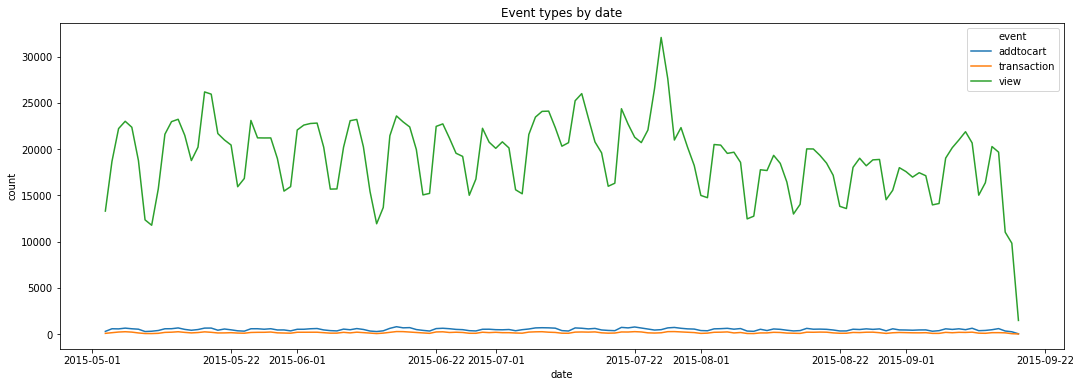

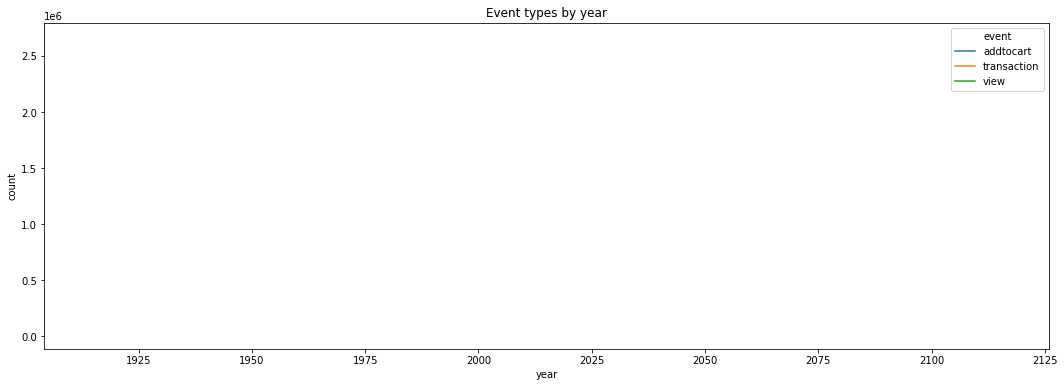

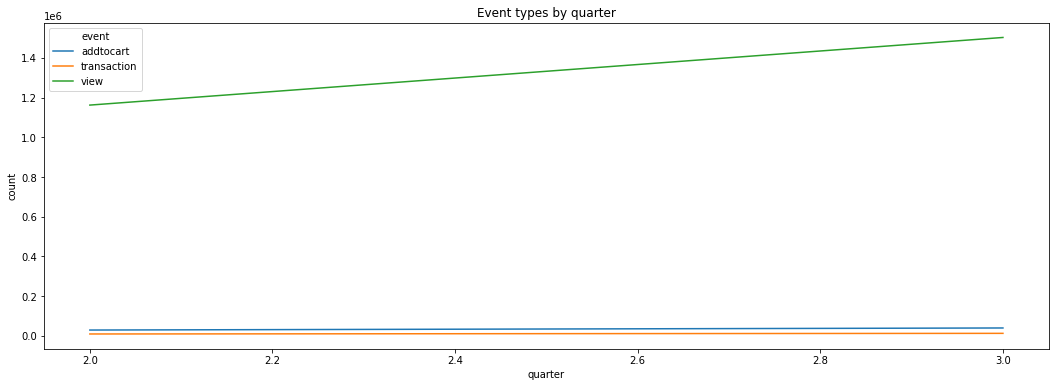

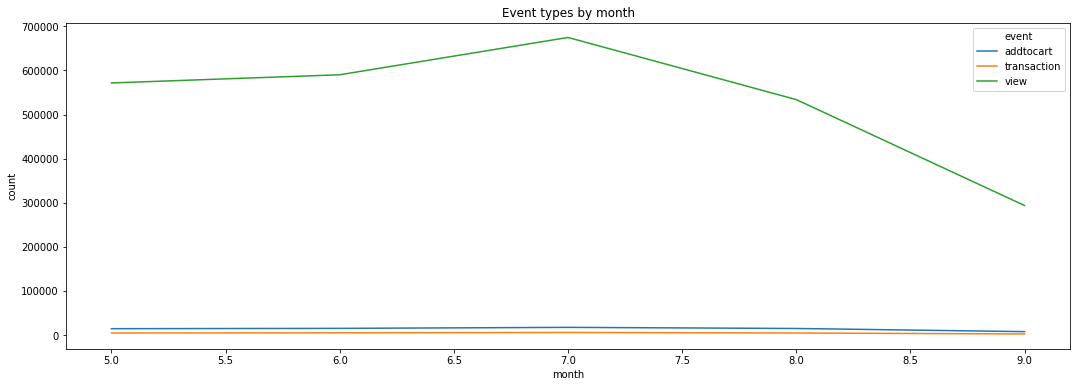

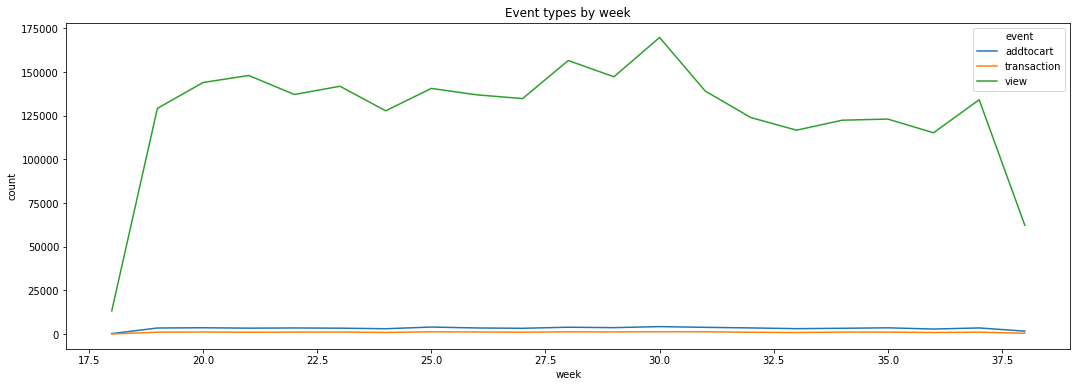

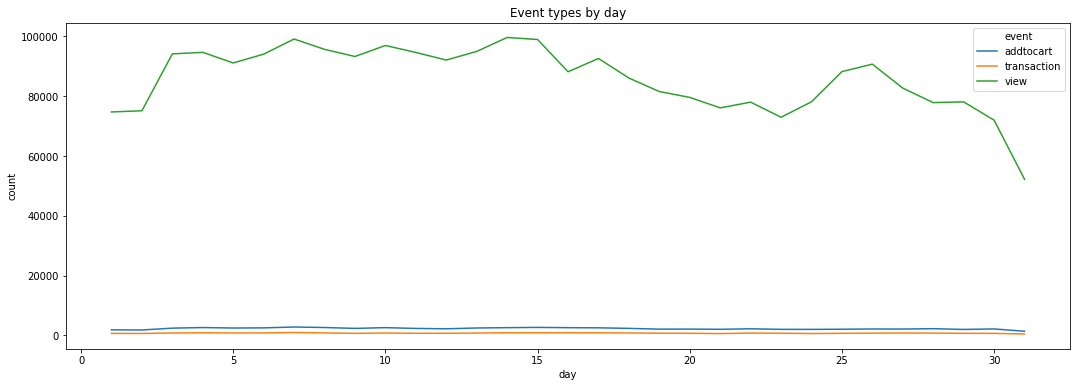

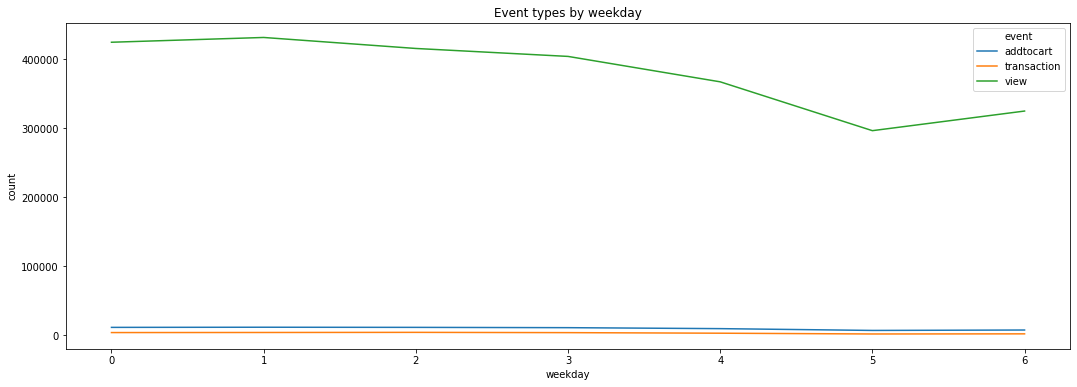

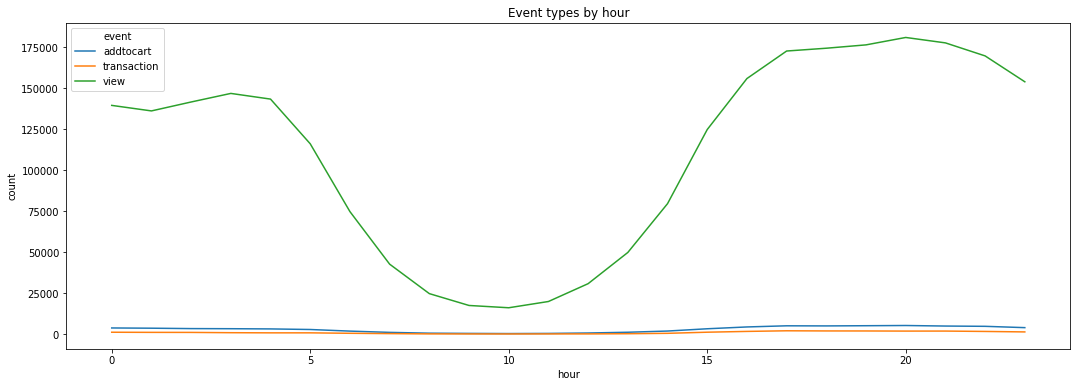

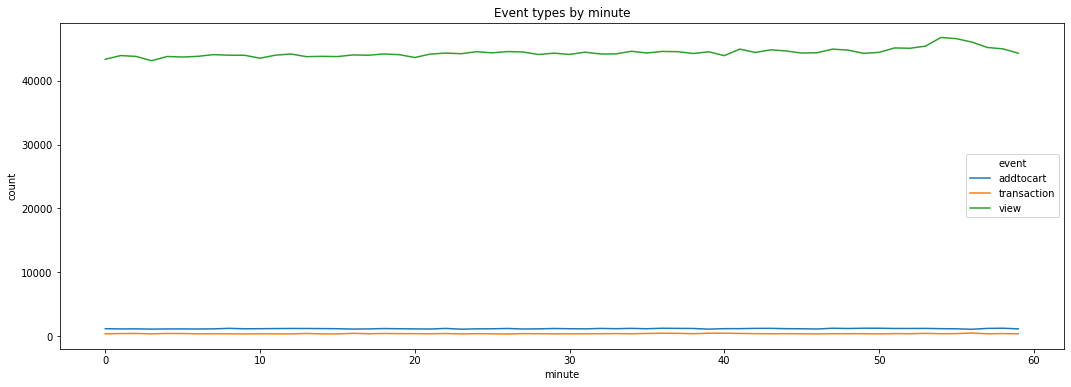

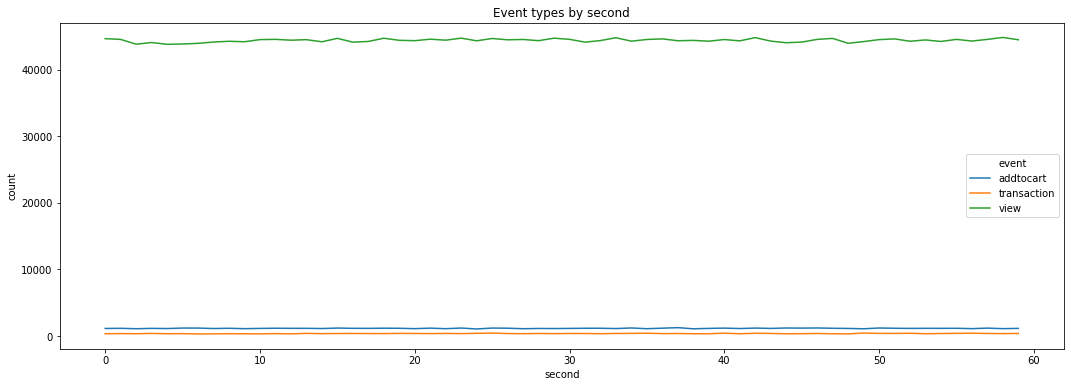

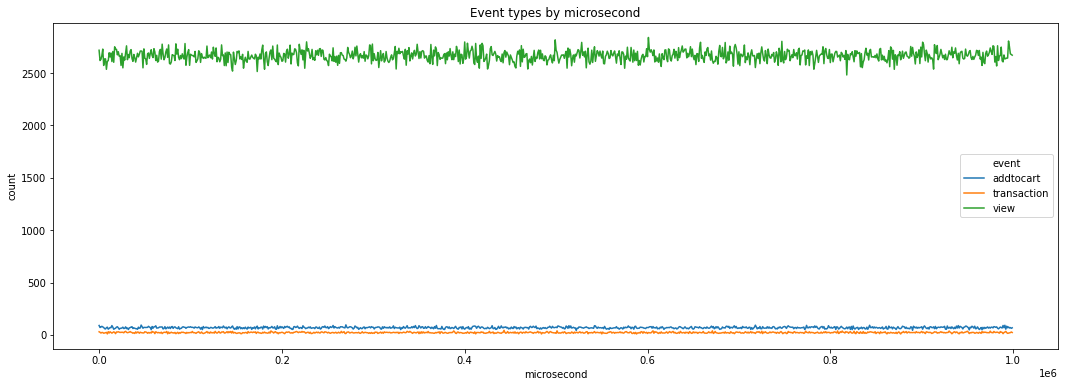

In [133]:
for unit in time_units:
  unit_group = web_events_df.groupby([unit,'event']).count()['timestamp'].reset_index().rename(columns={'timestamp':'count'})
  plt.figure(figsize=(18,6))
  sns.lineplot(data=unit_group, x=unit,y='count', hue='event')
  plt.title(f'Event types by {unit}')
  plt.show()

Round datetimes by hour, aggregate, and see what insights you can discover.

In [142]:
web_events_df['hour_rounded'] = web_events_df['timestamp'].dt.round('H')

In [143]:
web_events_df['hour_rounded'].value_counts()

2015-07-27 01:00:00    2162
2015-07-26 20:00:00    2126
2015-07-14 19:00:00    2121
2015-05-19 20:00:00    2111
2015-07-27 00:00:00    2089
                       ... 
2015-09-16 11:00:00      56
2015-09-02 10:00:00      55
2015-05-10 11:00:00      47
2015-09-17 09:00:00      40
2015-09-17 10:00:00      27
Name: hour_rounded, Length: 3313, dtype: int64

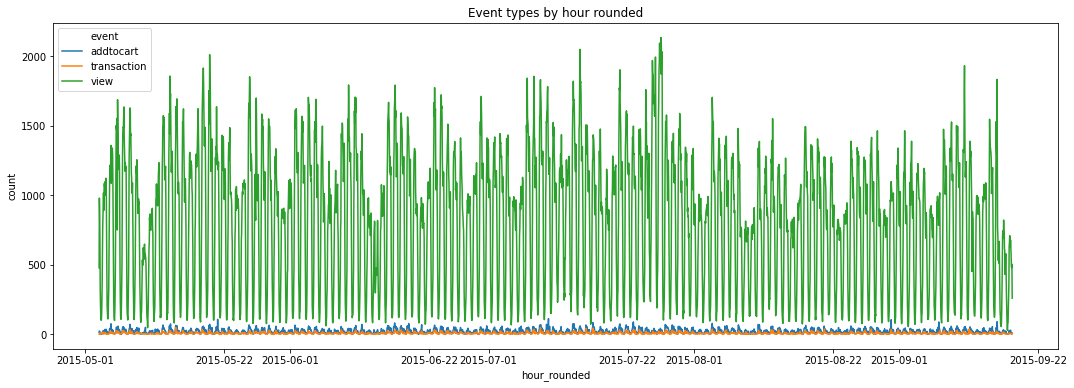

In [144]:
hour_round_group = web_events_df.groupby(['hour_rounded','event']).count()['timestamp'].reset_index().rename(columns={'timestamp':'count'})
plt.figure(figsize=(18,6))
sns.lineplot(data=hour_round_group, x='hour_rounded',y='count', hue='event')
plt.title(f'Event types by hour rounded')
plt.show()

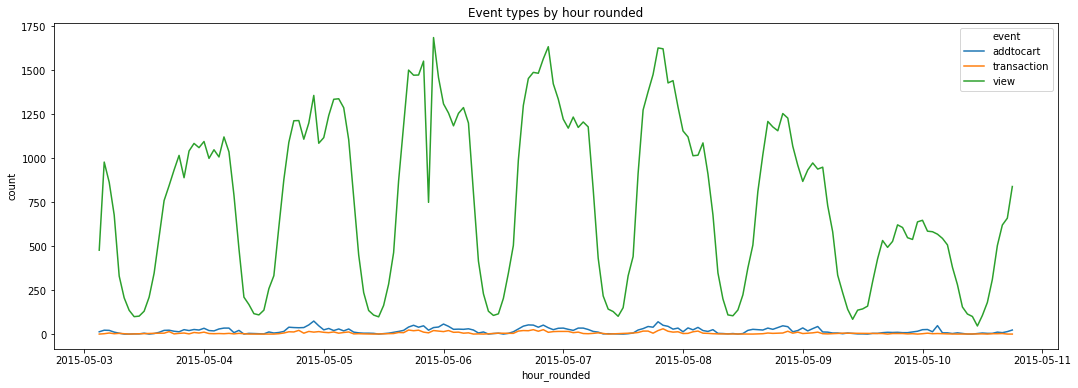

In [160]:
hour_round_group = web_events_df.groupby(['hour_rounded','event']).count()['timestamp'].reset_index().rename(columns={'timestamp':'count'})
plt.figure(figsize=(18,6))
sns.lineplot(data=hour_round_group.loc[:500,:], x='hour_rounded',y='count', hue='event')
plt.title(f'Event types by hour rounded')
plt.show()

In [157]:
hour_round_group.shape

(9239, 3)

In [154]:
hour_round_group.loc[0:10,:]

,hour_rounded,event,count
0,2015-05-03 03:00:00,addtocart,14
1,2015-05-03 03:00:00,transaction,1
2,2015-05-03 03:00:00,view,478
3,2015-05-03 04:00:00,addtocart,23
4,2015-05-03 04:00:00,transaction,3
5,2015-05-03 04:00:00,view,979
6,2015-05-03 05:00:00,addtocart,22
7,2015-05-03 05:00:00,transaction,7
8,2015-05-03 05:00:00,view,864
9,2015-05-03 06:00:00,addtocart,12


Load the [life_expectancy.csv](https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/life_expectancy.csv) data set into a Pandas dataframe.

In [289]:
life_df = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/life_expectancy.csv')
# life_df.head()

Transform/melt the data so that the years are listed in a single column instead of separate columns.

In [290]:
ids = ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code']

melt_fields = set(life_df.columns) - set(ids)

melted = pd.melt(life_df, 
                 id_vars=ids, 
                 value_vars=melt_fields,
                 var_name = 'Year',
                 value_name = 'Value',
                 )
melted.head()

,Country Name,Country Code,Indicator Name,Indicator Code,Year,Value
0,Aruba,ABW,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1963,66.787
1,Afghanistan,AFG,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1963,33.624
2,Angola,AGO,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1963,34.272
3,Albania,ALB,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1963,64.911
4,Andorra,AND,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1963,NaN


In [291]:
melted['Year'] = melted['Year'].astype('int')

In [292]:
melted = melted.sort_values(by=['Country Code','Year']).reset_index(drop=True)
melted

,Country Name,Country Code,Indicator Name,Indicator Code,Year,Value
0,Aruba,ABW,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1960,65.662
1,Aruba,ABW,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1961,66.074
2,Aruba,ABW,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1962,66.444
3,Aruba,ABW,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1963,66.787
4,Aruba,ABW,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1964,67.113
...,...,...,...,...,...,...
15043,Zimbabwe,ZWE,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,2012,56.516
15044,Zimbabwe,ZWE,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,2013,58.053
15045,Zimbabwe,ZWE,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,2014,59.360
15046,Zimbabwe,ZWE,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,2015,60.398


Practice address missing values for countries using the different approaches (imputation, interpolation, and deletion).

In [293]:
melted.isnull().sum()

Country Name         0
Country Code         0
Indicator Name       0
Indicator Code       0
Year                 0
Value             1301
dtype: int64

In [294]:
ffilled_by_country = pd.Series()
for code in melted['Country Code'].unique():
  ffilled = pd.Series(melted['Value'].loc[melted['Country Code']==code].fillna(method='ffill'), 
                     index=melted['Value'].loc[melted['Country Code']==code].index)
  ffilled_by_country = pd.concat([ffilled_by_country, ffilled])
melted['ffilled_by_country'] = ffilled_by_country

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """Entry point for launching an IPython kernel.


In [295]:
bfilled_by_country = pd.Series()
for code in melted['Country Code'].unique():
  bfilled = pd.Series(melted['Value'].loc[melted['Country Code']==code].fillna(method='bfill'), 
                     index=melted['Value'].loc[melted['Country Code']==code].index)
  bfilled_by_country = pd.concat([bfilled_by_country, bfilled])
melted['bfilled_by_country'] = bfilled_by_country

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """Entry point for launching an IPython kernel.


In [296]:
melted['smoothed_by_country'] = (melted['ffilled_by_country'] + melted['bfilled_by_country'])/2

In [297]:
meanfilled_by_country = pd.Series()
for code in melted['Country Code'].unique():
  meanfilled = pd.Series(melted['Value'].loc[melted['Country Code']==code].fillna(melted['Value'].loc[melted['Country Code']==code].mean()), 
                     index=melted['Value'].loc[melted['Country Code']==code].index)
  meanfilled_by_country = pd.concat([meanfilled_by_country, meanfilled])
melted['meanfilled_by_country'] = meanfilled_by_country

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """Entry point for launching an IPython kernel.


In [298]:
mean_ffilled_by_country = pd.Series()
for code in melted['Country Code'].unique():
  mean_ffilled = pd.Series(melted['ffilled_by_country'].loc[melted['Country Code']==code].fillna(melted['ffilled_by_country'].loc[melted['Country Code']==code].mean()), 
                     index=melted['ffilled_by_country'].loc[melted['Country Code']==code].index)
  mean_ffilled_by_country = pd.concat([mean_ffilled_by_country, mean_ffilled])
melted['mean_ffilled_by_country'] = mean_ffilled_by_country

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """Entry point for launching an IPython kernel.


In [300]:
mean_bfilled_by_country = pd.Series()
for code in melted['Country Code'].unique():
  mean_bfilled = pd.Series(melted['bfilled_by_country'].loc[melted['Country Code']==code].fillna(melted['bfilled_by_country'].loc[melted['Country Code']==code].mean()), 
                     index=melted['bfilled_by_country'].loc[melted['Country Code']==code].index)
  mean_bfilled_by_country = pd.concat([mean_bfilled_by_country, mean_bfilled])
melted['mean_bfilled_by_country'] = mean_bfilled_by_country

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """Entry point for launching an IPython kernel.


In [302]:
best_filled_by_country = pd.Series()
for code in melted['Country Code'].unique():
  ffilled = pd.Series(melted['Value'].loc[melted['Country Code']==code].fillna(method='ffill'), 
                     index=melted['Value'].loc[melted['Country Code']==code].index)
  bfilled = pd.Series(ffilled.fillna(method='bfill'), 
                    index=ffilled.index)
  mean_filled = pd.Series(bfilled.fillna(bfilled.mean()), 
                     index=bfilled.index)
  best_filled_by_country = pd.concat([best_filled_by_country, mean_filled])

melted['best_filled_by_country'] = best_filled_by_country

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """Entry point for launching an IPython kernel.


In [303]:
melted.isnull().sum()

Country Name                  0
Country Code                  0
Indicator Name                0
Indicator Code                0
Year                          0
Value                      1301
ffilled_by_country         1095
bfilled_by_country          656
smoothed_by_country        1181
meanfilled_by_country       570
mean_ffilled_by_country     570
mean_bfilled_by_country     570
best_filled_by_country      570
dtype: int64

For this data, the best way is to start by front filling the data after sorting by `Country Code` and by `Year`. This will be the most consistent fill as it uses the nearest historical point of reference. 

The remaining null values will then attempt to be filled with a back fill and then the remaining will be filled by a country mean value. 

Any other missing values would indicate that there is no value for that given country. So, other methods to predict those values would need to be performed or just drop them from the dataframe.

#Lecture Notes

In [35]:
df = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/web_events.csv')

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2756101 entries, 0 to 2756100
Data columns (total 5 columns):
 #   Column         Dtype  
---  ------         -----  
 0   timestamp      int64  
 1   visitorid      int64  
 2   event          object 
 3   itemid         int64  
 4   transactionid  float64
dtypes: float64(1), int64(3), object(1)
memory usage: 105.1+ MB


In [37]:
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')

In [38]:
df

,timestamp,visitorid,event,itemid,transactionid
0,2015-06-02 05:02:12.117,257597,view,355908,NaN
1,2015-06-02 05:50:14.164,992329,view,248676,NaN
2,2015-06-02 05:13:19.827,111016,view,318965,NaN
3,2015-06-02 05:12:35.914,483717,view,253185,NaN
4,2015-06-02 05:02:17.106,951259,view,367447,NaN
...,...,...,...,...,...
2756096,2015-08-01 03:13:05.939,591435,view,261427,NaN
2756097,2015-08-01 03:30:13.142,762376,view,115946,NaN
2756098,2015-08-01 02:57:00.527,1251746,view,78144,NaN
2756099,2015-08-01 03:08:50.703,1184451,view,283392,NaN


In [39]:
june = df.loc[df['timestamp'].dt.month==6]

In [43]:
june['timestamp'].min(), june['timestamp'].max()

(Timestamp('2015-06-01 00:00:01.707000'),
 Timestamp('2015-06-30 23:59:59.292000'))

In [44]:
june['timestamp'].dt.month.value_counts()

6    610393
Name: timestamp, dtype: int64

In [50]:
june['timestamp'].dt.weekday

0          1
1          1
2          1
3          1
4          1
          ..
2059464    0
2059465    0
2059466    0
2059467    0
2059468    0
Name: timestamp, Length: 610393, dtype: int64

In [49]:
june['timestamp'].dt.strftime('%A')

0          Tuesday
1          Tuesday
2          Tuesday
3          Tuesday
4          Tuesday
            ...   
2059464     Monday
2059465     Monday
2059466     Monday
2059467     Monday
2059468     Monday
Name: timestamp, Length: 610393, dtype: object

In [68]:
df['timestamp'].dt.round('D')

0         2015-06-02
1         2015-06-02
2         2015-06-02
3         2015-06-02
4         2015-06-02
             ...    
2756096   2015-08-01
2756097   2015-08-01
2756098   2015-08-01
2756099   2015-08-01
2756100   2015-08-01
Name: timestamp, Length: 2756101, dtype: datetime64[ns]

In [67]:
df['timestamp'].dt.round('Min')

0         2015-06-02 05:02:00
1         2015-06-02 05:50:00
2         2015-06-02 05:13:00
3         2015-06-02 05:13:00
4         2015-06-02 05:02:00
                  ...        
2756096   2015-08-01 03:13:00
2756097   2015-08-01 03:30:00
2756098   2015-08-01 02:57:00
2756099   2015-08-01 03:09:00
2756100   2015-08-01 03:36:00
Name: timestamp, Length: 2756101, dtype: datetime64[ns]

In [65]:
df['timestamp'].dt.round('S')

0         2015-06-02 05:02:12
1         2015-06-02 05:50:14
2         2015-06-02 05:13:20
3         2015-06-02 05:12:36
4         2015-06-02 05:02:17
                  ...        
2756096   2015-08-01 03:13:06
2756097   2015-08-01 03:30:13
2756098   2015-08-01 02:57:01
2756099   2015-08-01 03:08:51
2756100   2015-08-01 03:36:04
Name: timestamp, Length: 2756101, dtype: datetime64[ns]

In [51]:
life_df = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/life_expectancy.csv')

In [53]:
life_df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Aruba,ABW,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,65.662,66.074,66.444,66.787,67.113,67.435,67.762,68.095,68.436,68.784,69.140,69.498,69.851,70.191,70.519,70.833,71.140,71.441,71.736,72.023,72.293,72.538,72.751,72.929,73.071,73.181,73.262,73.325,73.378,73.425,73.468,73.509,73.544,73.573,73.598,73.622,73.646,73.671,73.700,73.738,73.787,73.853,73.937,74.038,74.156,74.287,74.429,74.576,74.725,74.872,75.016,75.158,75.299,75.440,75.582,75.725,75.867
1,Afghanistan,AFG,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,32.292,32.742,33.185,33.624,34.060,34.495,34.928,35.361,35.796,36.234,36.678,37.128,37.587,38.056,38.540,39.039,39.556,40.092,40.650,41.234,41.853,42.513,43.217,43.963,44.747,45.566,46.417,47.288,48.164,49.028,49.856,50.627,51.331,51.968,52.539,53.055,53.533,53.997,54.468,54.959,55.482,56.044,56.637,57.250,57.875,58.500,59.110,59.694,60.243,60.754,61.226,61.666,62.086,62.494,62.895,63.288,63.673
2,Angola,AGO,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,33.251,33.573,33.914,34.272,34.645,35.031,35.426,35.828,36.234,36.640,37.047,37.460,37.878,38.297,38.712,39.110,39.478,39.810,40.099,40.344,40.546,40.710,40.848,40.970,41.085,41.193,41.292,41.382,41.471,41.572,41.696,41.855,42.060,42.329,42.677,43.125,43.695,44.385,45.192,46.105,47.113,48.200,49.341,50.508,51.676,52.833,53.974,55.096,56.189,57.231,58.192,59.042,59.770,60.373,60.858,61.241,61.547
3,Albania,ALB,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,62.279,63.298,64.187,64.911,65.461,65.848,66.108,66.302,66.485,66.687,66.933,67.235,67.580,67.951,68.341,68.734,69.108,69.447,69.741,69.990,70.207,70.416,70.635,70.876,71.134,71.388,71.605,71.760,71.843,71.860,71.836,71.803,71.802,71.860,71.992,72.205,72.495,72.838,73.208,73.588,73.955,74.286,74.575,74.820,75.028,75.217,75.418,75.656,75.943,76.281,76.652,77.031,77.389,77.702,77.963,78.174,78.345
4,Andorra,AND,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [59]:
ids = ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code']

melt_fields = set(life_df.columns) - set(ids)
# melt_fields_2 = list(life_df.columns.drop(ids))

In [61]:
melted = pd.melt(life_df, 
                 id_vars=ids, 
                 value_vars=melt_fields,
                 var_name = 'Year',
                 value_name = 'Value',
                 )
melted.head()

,Country Name,Country Code,Indicator Name,Indicator Code,Year,Value
0,Aruba,ABW,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1963,66.787
1,Afghanistan,AFG,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1963,33.624
2,Angola,AGO,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1963,34.272
3,Albania,ALB,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1963,64.911
4,Andorra,AND,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1963,NaN
